# Projeto de Aprendizagem Não Supervisionada

Esse trabalho visa utilizar técnicas de aprendizagem não-supervisionada para detectar se um paciente tem ou não doença cardíaca.

## Os dados

O *data set* utilizado foi o [Heart Disease UCI](https://archive.ics.uci.edu/ml/datasets/Heart+Diseas) da UCI. Ele é um arquivo *.csv* com 303 amostras e 14 atributos. Os atributos são:

> 1. age - Idade em anos 
> 2. sex - Sexo do paciente 
>> 1: homem -  0: mulher
> 3. cp (chest pain type) - tipo de dor no peito (4 valores)
>> 1: typical angina  - 2: atypical angina - 3: non-anginal pain - 4: asymptomatic 
> 4. trestbps - pressão sanguínea em repouso (em mmHg no momento de admissão no hospital) 
> 5. chol - Colesterol no soro (em mg/dl) 
> 6. fbs - Glicose em jejum > 120 mg/dl
>> 1: true - 0: false
> 7. restecg - resultados do eletrocardiografo (3 valores):
>> 0: normal - 1: ST-T wave abnormality - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
> 8. thalach - Máxima taxa cardíaca atingida 
> 9. exang - Angina induzida por exercício 
>> 1: sim - 0: não
> 10. oldpeak - depressão ST unduzida por exercício relativo ao repouso 
> 11.slope - Inclinação do pico do segmento ST de exercício
> 12. ca - Número de veias principais coloridas por flourosopy (3 valores)
> 13. thal - Doença sanguinea thalassemia: 
>> 3: normal - 6: fixed defect - 7: reversable defect
> 14. Target - o label da classificação, se tem ou não doença cardíaca
>> 1: sim - 0: não

### Visualizando e limpando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Verificando se há valores nulos no dataframe
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# Verificando número de amostras e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
# Verificando os labels
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

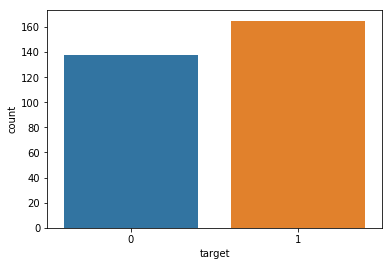

In [6]:
sns.countplot(x="target", data=df)
plt.show()

### Variáveis categóricas

As variáveis cp (dor no peito), restecg (resultados do eletrocardiografo), ca, thal, slope são variáveis categóricas e, portanto, devem ser transformadas em vetores numéricos para serem utilizadas como entrada nos algoritmos de *machine learning*. Para isso, elas são transformadas em vetores *one-hot* e novas colunas são criadas na tabela.

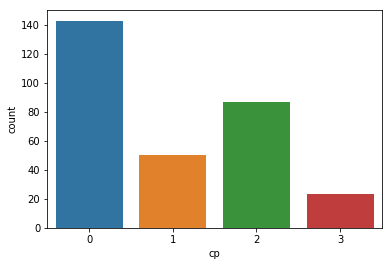

In [7]:
sns.countplot(x="cp", data=df)
plt.show()

In [8]:
# Separando a coluna de label
X = df.drop(columns='target')
y = df['target']

In [9]:
# Transformando variáveis categóricas em vetores e acrescentando as novas colunas na tabela
a = pd.get_dummies(df["cp"],prefix="cp")
b = pd.get_dummies(df["restecg"],prefix="restecg")
c = pd.get_dummies(df["ca"],prefix="ca")
d = pd.get_dummies(df["thal"],prefix="thal")
e = pd.get_dummies(df["slope"],prefix="slope")
                   
frames = [X, a, b, c, d, e]
X = pd.concat(frames, axis = 1)
X = X.drop(columns = ['ca', 'cp', 'thal', 'slope', 'restecg'])

In [10]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1', 'restecg_2',
       'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2',
       'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [11]:
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,0,0,0,0,1,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,163,1,0.6,1,0,...,0,0,0,0,0,1,0,0,0,1


In [12]:
# Normalização dos dados para que todas as entradas fiquem entre 0 e 1
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Modelo

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
# Separando os dados em dados de teste e treinamento
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

### PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
# Escolhendo o modelo
pca = PCA(n_components=2)
# Calculando os componentes principais de todos os dados
x_pca = pca.fit_transform(X)

In [16]:
# Organizando as componentes principais para plotar com a label
pca_x_yes = []
pca_y_yes = []
pca_x_no = []
pca_y_no = []
for i in range(len(X)):
    if(y.iloc[i] == 1):
        pca_x_yes.append(x_pca[:,0][i])
        pca_y_yes.append(x_pca[:,1][i])
    else:
        pca_x_no.append(x_pca[:,0][i])
        pca_y_no.append(x_pca[:,1][i])

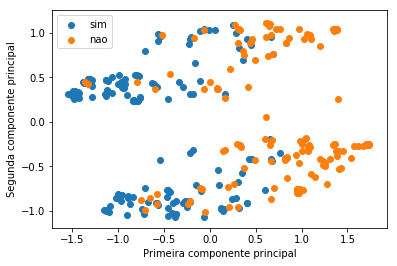

In [17]:
labels = ['sim', 'nao']
fig, ax = plt.subplots()
for l in labels:
    if(l == 'sim'):
        x1=pca_x_yes
        y1=pca_y_yes
    if(l =='nao'):
        x1=pca_x_no
        y1=pca_y_no
    ax.scatter(x1,y1, label=l)
ax.legend()
plt.xlabel('Primeira componente principal')
plt.ylabel('Segunda componente principal')
plt.show()

Pode-se ver na imagem a projeção dos dois primeiros componentes principais e suas respectivas clssificações. Observamos que eles não formam clusters tão bem definidos, com sobreposição das classes.

### K-means

In [18]:
from sklearn.cluster import KMeans

Treinando o modelo de k-means utilizando as features de entrada originais

In [113]:
# Escolhendo o modelo
kmeans = KMeans(n_clusters=2, random_state=42)
# Computando os centróides dos clusters e prevendo os índices
y_pred_k = kmeans.fit_predict(X)

In [77]:
# Organizando as componentes principais para plotar com a label
pca_x_yes_pred = []
pca_y_yes_pred = []
pca_x_no_pred = []
pca_y_no_pred = []
for i in range(len(X)):
    if(y_pred_k[i] == 1):
        pca_x_yes_pred.append(x_pca[:,0][i])
        pca_y_yes_pred.append(x_pca[:,1][i])
    else:
        pca_x_no_pred.append(x_pca[:,0][i])
        pca_y_no_pred.append(x_pca[:,1][i])

Visualização da clusterização nos componentes principais

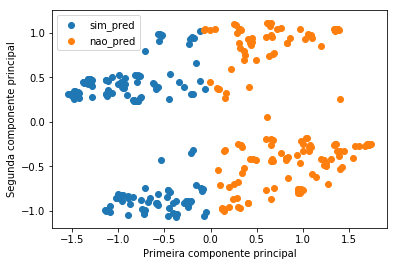

In [114]:
labels = ['sim_pred', 'nao_pred']
fig, ax = plt.subplots()
for l in labels:
    if(l == 'sim_pred'):
        x1=pca_x_yes_pred
        y1=pca_y_yes_pred
    if(l =='nao_pred'):
        x1=pca_x_no_pred
        y1=pca_y_no_pred
    ax.scatter(x1,y1, label=l)
ax.legend()
plt.xlabel('Primeira componente principal')
plt.ylabel('Segunda componente principal')
plt.show()

O algoritmo k-means é um método não supervisionado, mas como temos acesso ao labels, podemos calcular sua acurácia.

In [79]:
# Acurácia
accuracy_kmeans = accuracy_score(y,y_pred_k)
print('Acurácia kmeans ', accuracy_kmeans)

Acurácia kmeans  0.8283828382838284


Treinando o modelo de k-means utilizando os componentes principais como entrada

In [109]:
# Escolhendo o modelo
kmeans = KMeans(n_clusters=2, random_state=0)
# Computando os centróides dos clusters e prevendo os índices
y_pred_k = kmeans.fit_predict(x_pca)

In [110]:
# Organizando as componentes principais para plotar com a label
pca_x_yes_pred = []
pca_y_yes_pred = []
pca_x_no_pred = []
pca_y_no_pred = []
for i in range(len(x_pca)):
    if(y_pred_k[i] == 1):
        pca_x_yes_pred.append(x_pca[:,0][i])
        pca_y_yes_pred.append(x_pca[:,1][i])
    else:
        pca_x_no_pred.append(x_pca[:,0][i])
        pca_y_no_pred.append(x_pca[:,1][i])

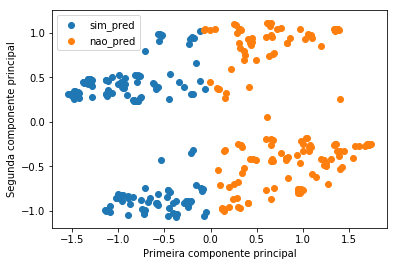

In [111]:
labels = ['sim_pred', 'nao_pred']
fig, ax = plt.subplots()
for l in labels:
    if(l == 'sim_pred'):
        x1=pca_x_yes_pred
        y1=pca_y_yes_pred
    if(l =='nao_pred'):
        x1=pca_x_no_pred
        y1=pca_y_no_pred
    ax.scatter(x1,y1, label=l)
ax.legend()
plt.xlabel('Primeira componente principal')
plt.ylabel('Segunda componente principal')
plt.show()

In [112]:
# Acurácia
accuracy_kmeans = accuracy_score(y,y_pred_k)
print('Acurácia kmeans ', accuracy_kmeans)

Acurácia kmeans  0.8316831683168316
